In [1]:
# Package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data cleaning and wrangling

## Load, explore, and transform data

In [2]:
# Load data
power = pd.read_csv("https://raw.githubusercontent.com/zeitgeist-hash/GRAD-C24-Machine-Learning/main/Tetuan%20City%20power%20consumption.csv")

# Explore
power.info()
power.describe()

In [4]:
# Transform

#Formatting the columns
power["DT"] = pd.to_datetime(power["DateTime"])
power.columns = power.columns.str.replace(' ', '')
power=power.rename(columns={"generaldiffuseflows": "GeneralDiffuseFlows", "diffuseflows": "DiffuseFlows", "Zone1PowerConsumption":"Zone1", "Zone2PowerConsumption":"Zone2","Zone3PowerConsumption":"Zone3"})

#Aggregate consumption
power["MeanConsumption"] = power[['Zone1', 'Zone2', 'Zone3']].mean(axis=1)

#Inserting dummy variables for temporal data -- some of these may be redundant
power["Month"]=pd.DatetimeIndex(power['DT']).month
power["Day"]=pd.DatetimeIndex(power['DT']).day # returns day of month from 1 to 31
power["DayOfWeek"]=pd.DatetimeIndex(power['DT']).weekday # day of week from 0 to 6
power["Weekday"] = (pd.DatetimeIndex(power['DT']).weekday < 5).astype(int) # 1-0 dummy for weekday or not
power["Hour"]=pd.DatetimeIndex(power['DT']).hour
power["Week"]=pd.DatetimeIndex(power['DT']).week

#Seasons: 
seasons = [1,1,2,2,2,3,3,3,4,4,4,1]
month_to_season = dict(zip(range(1,13), seasons))
power["Season"]=power.DT.dt.month.map(month_to_season) 

#Creating a new dataframe with hourly aggregates
power_hour = power.groupby(["Month", "Day", "Hour"], as_index=False).mean().copy()
power_hour["Year"] = 2017
power_hour["DT"] = pd.to_datetime(power_hour[["Year", "Month", "Day", "Hour"]])
power_hour = power_hour.set_index('DT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [7]:
power_hour.head(-10)

,Month,Day,Hour,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Zone1,Zone2,Zone3,MeanConsumption,DayOfWeek,Weekday,Week,Season,Year
DT,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,1,1,0,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193,22158.923532,6.0,0.0,52.0,1.0,2017
2017-01-01 01:00:00,1,1,1,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567,19259.508737,6.0,0.0,52.0,1.0,2017
2017-01-01 02:00:00,1,1,2,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578,17363.293880,6.0,0.0,52.0,1.0,2017
2017-01-01 03:00:00,1,1,3,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422,16304.815849,6.0,0.0,52.0,1.0,2017
2017-01-01 04:00:00,1,1,4,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433,15904.879449,6.0,0.0,52.0,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 09:00:00,12,30,9,11.336667,47.813333,0.077500,140.816667,27.140000,25764.258555,21537.281375,8410.084034,18570.541321,5.0,0.0,52.0,1.0,2017
2017-12-30 10:00:00,12,30,10,12.958333,44.521667,0.076333,293.333333,34.770000,28848.669200,23769.254373,9368.547419,20662.156997,5.0,0.0,52.0,1.0,2017
2017-12-30 11:00:00,12,30,11,13.806667,42.128333,0.077667,413.550000,37.781667,30450.697085,25531.758208,9855.462184,21945.972493,5.0,0.0,52.0,1.0,2017


# Visualizations

## Histograms
Windspeed, general diffuse flows, and diffuse flows have an interesting distribution.

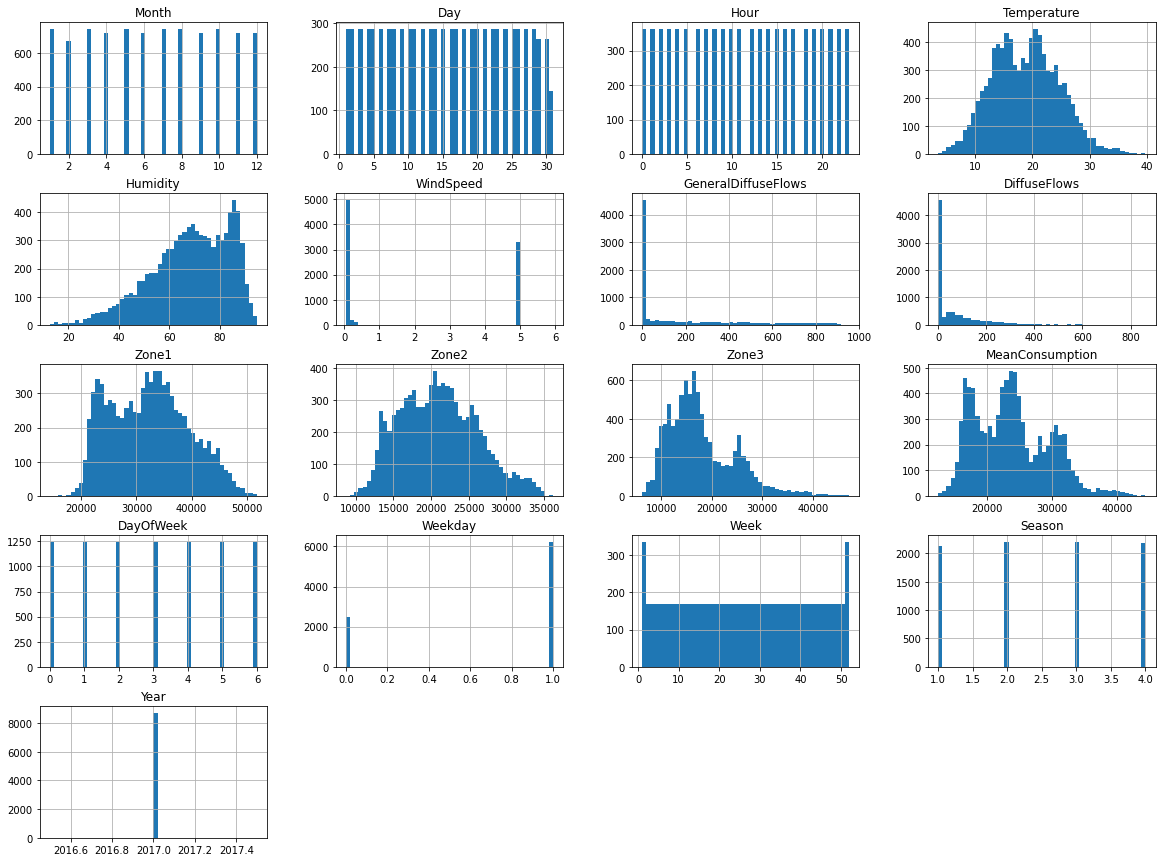

In [8]:
%matplotlib inline
power_hour.hist(bins=50, figsize=(20,15))
plt.show()

## Correlations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


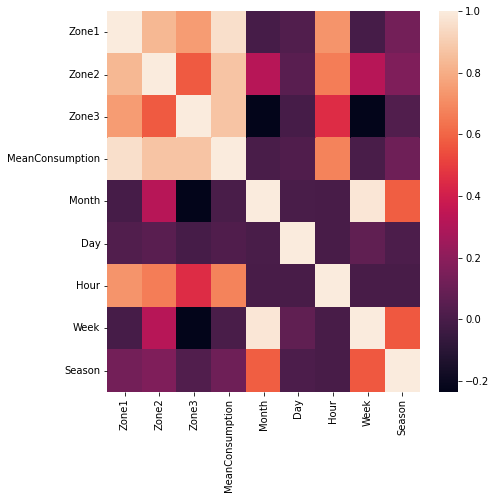

In [14]:
#Creating a Dataframe to explore temporal correlations
power1=power.iloc[:, 6:11]

#Inserting dummy variables for temporal data
power1["Month"]= power1.DT.dt.month
power1["Day"]= power1.DT.dt.day
power1["Hour"]= power1.DT.dt.hour
power1["Week"]= power1.DT.dt.week

#Seasons: 
seasons1 = [1,1,2,2,2,3,3,3,4,4,4,1]
month_to_season1 = dict(zip(range(1,13), seasons1))
power1["Season"]=power1.DT.dt.month.map(month_to_season1) 

power1.head(5)

tcorr_matrix = power1.corr()
tcorr_matrix

#Plot of the correlation matrix with temporal data
plt.figure(figsize=(7,7))
sns.heatmap(tcorr_matrix)

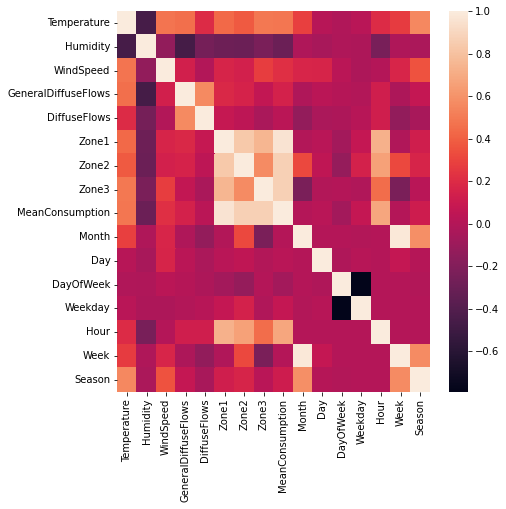

In [15]:
#finding correlation among all numeric non temporal variables (except for date and time) 
corr_matrix = power.corr()
corr_matrix

#Plot of the correlation matrix
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5777edbd0>,
      dtype=object)

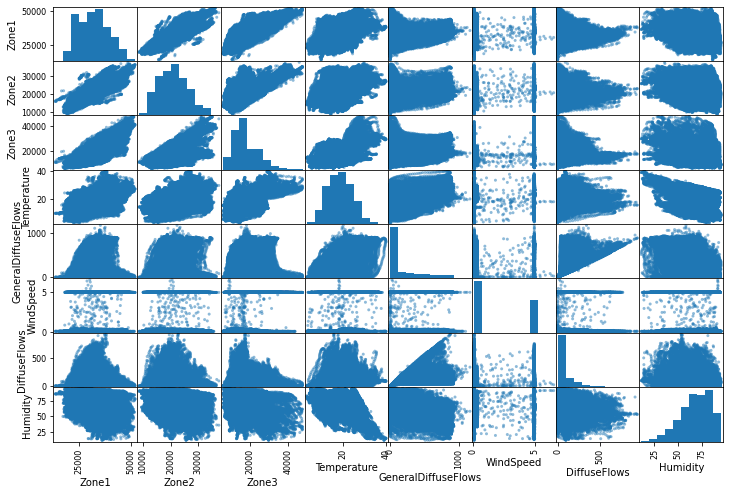

In [16]:
#Zoom in into Zone1 Consumption
corr_matrix["Zone1"].sort_values(ascending=False)

#Plotting correlations for Zone1
from pandas.plotting import scatter_matrix
attributes = ["Zone1", "Zone2", "Zone3", "Temperature", "GeneralDiffuseFlows", "WindSpeed", "DiffuseFlows", "Humidity"]
scatter_matrix(power[attributes], figsize=(12, 8))

## Consumption by zone visualizations
We notice that consumption in general spikes notably in the summer (July and August). For Zone 1 and Zone 2, consumption is higher during than the week as compared to the weekends. Zone 3's consumption is generally lower, yet spikes considerably during the summer months as compared to the other 2.

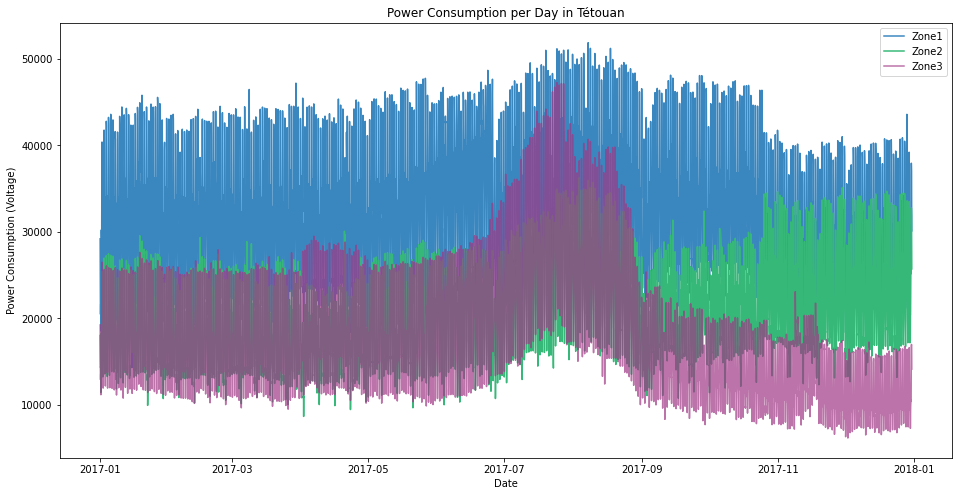

In [10]:
#Plotting energy consumption per datetime for each of the three zones. 
x=power_hour.index
y1=power_hour["Zone1"]
y2=power_hour["Zone2"]
y3=power_hour["Zone3"]

plt.figure(figsize=(16,8))
plt.plot(x, y1, label = "Zone1", color="#3a87c0")
plt.plot(x, y2, label = "Zone2", color="#36b878")
plt.plot(x, y3, label = "Zone3",color ="#a03885", alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Power Consumption (Voltage)')
plt.title("Power Consumption per Day in Tétouan")
plt.legend()
plt.show()

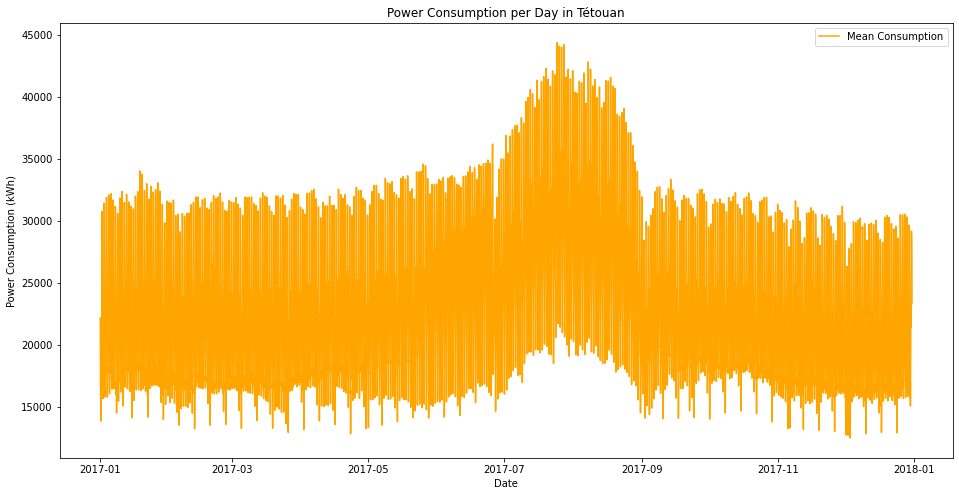

In [13]:
#Plotting mean energy consumption for aggregate of all zones
x=power_hour.index
y1=power_hour["MeanConsumption"]

plt.figure(figsize=(16,8))
plt.plot(x, y1, label = "Mean Consumption", color="orange")

plt.xlabel('Date')
plt.ylabel('Power Consumption (kWh)')
plt.title("Power Consumption per Day in Tétouan")
plt.legend()
plt.show()

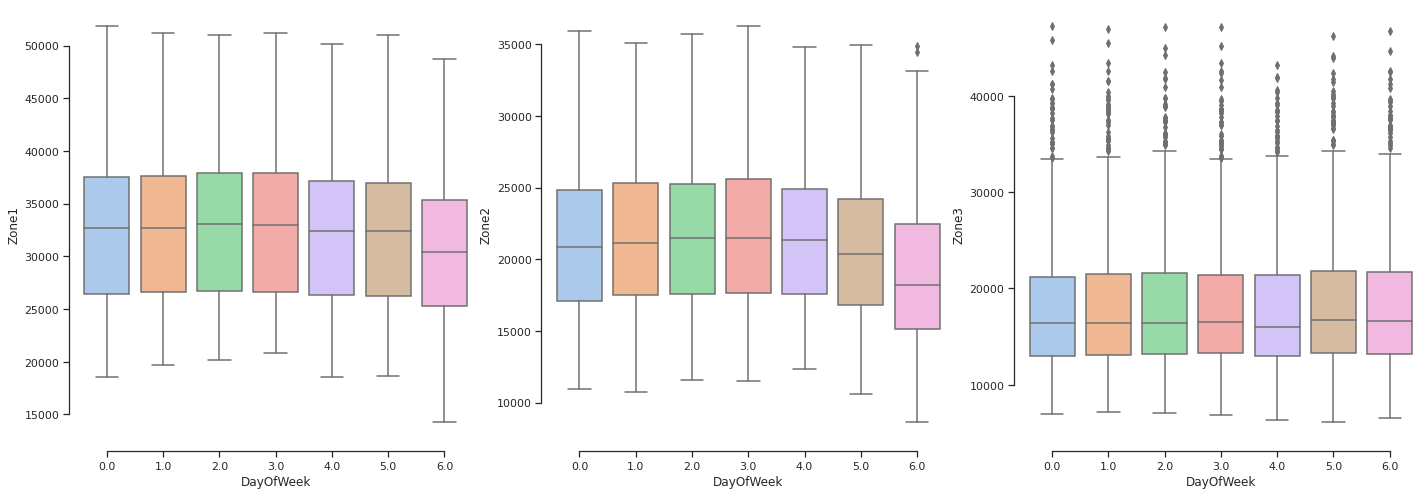

In [18]:
#Weekly distribution of the power consumption by zone
sns.set_theme(style="ticks", palette="pastel")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))


# Draw a nested boxplot to show bills by day and time
sns.boxplot(ax=axes[0], x=power_hour["DayOfWeek"], y=power_hour["Zone1"],data=power_hour)
sns.boxplot(ax=axes[1], x=power_hour["DayOfWeek"], y=power_hour["Zone2"],data=power_hour)
sns.boxplot(ax=axes[2], x=power_hour["DayOfWeek"], y=power_hour["Zone3"],data=power_hour)
sns.despine(offset=10, trim=True)


## Exploring distributions in depth
3 variables in particular (windspeed, general diffuse flows, and diffuse flows) have interesting distributions. Here we dive deeper by subsetting them, speculating that their distribution is driven by season and hour of day.

### Windspeed

No handles with labels found to put in legend.


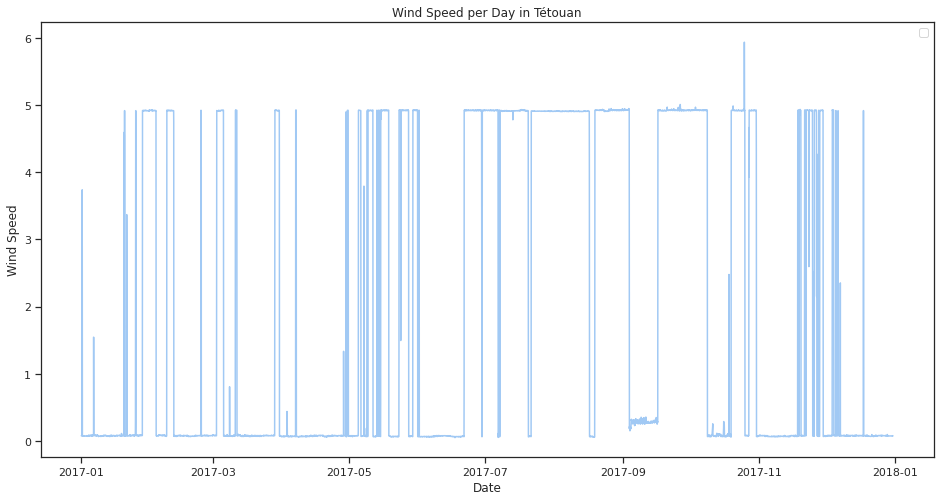

In [20]:
# Visualize wind speed
x_wind=power_hour.index
y_wind=power_hour["WindSpeed"]

plt.figure(figsize=(16,8))
plt.plot(x_wind, y_wind)

plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.title("Wind Speed per Day in Tétouan")
plt.legend()
plt.show()

In [102]:
# Further analysis into windspeed, which has 2 peaks at ~0 and ~5, with very few observations in between
wind_analysis = power_hour.copy()

# Cut into 3 bins, splitting range of windspeed into 3 buckets
wind_analysis['windspeed_cut_n'] = pd.cut(wind_analysis['WindSpeed'], 3)
#wind_analysis['windspeed_qcut_n'] = pd.qcut(wind_analysis['WindSpeed'], 3)

wind_analysis['windspeed_cut_n'].value_counts()
wind_analysis['windspeed_cut_n'].value_counts().plot(kind='barh')
plt.show()

# Subset 1
wind_subset1 = wind_analysis[wind_analysis['WindSpeed']<2.014].copy()
wind_subset1["Month"].value_counts() # Seems to be correlated with cooler months (November to April range)
wind_subset1.describe() # Mean temp of 16.6
hist1 = wind_subset1.hist(column = "WindSpeed", bins=30)

# Subset 2
wind_subset2 = wind_analysis[(wind_analysis['WindSpeed']>=2.014) & (wind_analysis['WindSpeed']< 3.974)].copy()
wind_subset2["Month"].value_counts() # November and May most present, hard to glean serious insights though
wind_subset2.describe() # Mean temp of 18.3
hist2 = wind_subset2.hist(column = "WindSpeed", bins=30)

# Subset 3
wind_subset3 = wind_analysis[wind_analysis['WindSpeed']>=3.974].copy()
wind_subset3["Month"].value_counts() # July and August most present
wind_subset3.describe() # Mean temp 22.3
hist3 = wind_subset3.hist(column = "WindSpeed", bins=30)


,Month,Day,Hour,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Zone1,Zone2,Zone3,MeanConsumption,DayOfWeek,Weekday,Week,Season,Year
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.0
mean,7.229528,17.508667,11.519725,22.320860,65.653716,4.913825,227.155475,74.437768,33857.664006,22001.471004,20209.447558,25356.194190,3.075314,0.699641,29.710102,2.998506,2017.0
std,2.439199,9.614579,6.817572,5.439090,17.164382,0.046711,289.519779,109.072219,7082.896943,5143.279237,7807.415744,6160.647891,1.976773,0.458482,10.721377,0.864685,0.0
min,1.000000,1.000000,0.000000,4.643833,14.236667,4.023000,0.022000,0.040000,19036.727663,10156.707317,6614.939759,13001.931604,0.000000,0.000000,3.000000,1.000000,2017.0
25%,6.000000,9.000000,6.000000,18.970833,54.087917,4.911875,0.080833,0.124208,28203.646487,17886.327295,13968.539325,20554.729807,1.000000,0.000000,26.000000,3.000000,2017.0
50%,8.000000,20.000000,11.500000,22.765000,67.634167,4.917667,43.490667,30.184167,33890.987848,21897.784810,18352.986179,24480.871677,3.000000,1.000000,31.000000,3.000000,2017.0
75%,9.000000,26.000000,17.000000,25.967917,79.850000,4.921000,445.475000,107.637500,38944.195338,25668.752954,25634.233751,30084.696206,5.000000,1.000000,38.000000,4.000000,2017.0
max,12.000000,31.000000,23.000000,37.210000,93.783333,5.933667,943.333333,719.466667,51844.261932,36254.699050,47223.765690,44376.608693,6.000000,1.000000,50.000000,4.000000,2017.0


### General Diffuse Flows

No handles with labels found to put in legend.


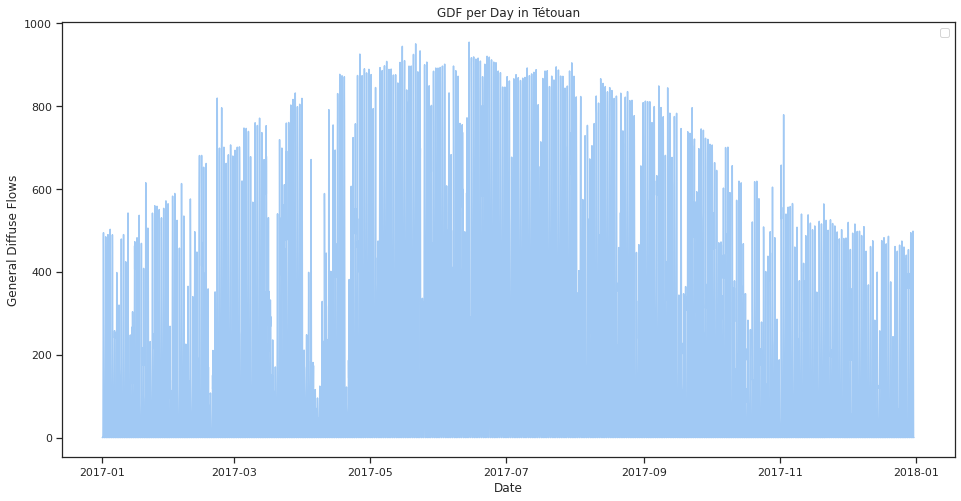

In [103]:
# Visualize
x_gdf=power_hour.index
y_gdf=power_hour["GeneralDiffuseFlows"]

plt.figure(figsize=(16,8))
plt.plot(x_gdf, y_gdf)

plt.xlabel('Date')
plt.ylabel('General Diffuse Flows')
plt.title("GDF per Day in Tétouan")
plt.legend()
plt.show()

# Notable dip around April, peaks in summer. Is this perhaps an hourly phenomenon, rather than monthly?

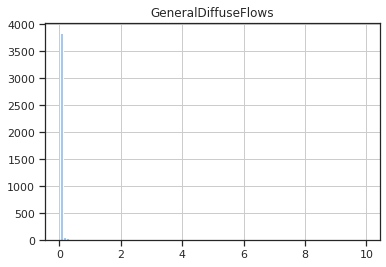

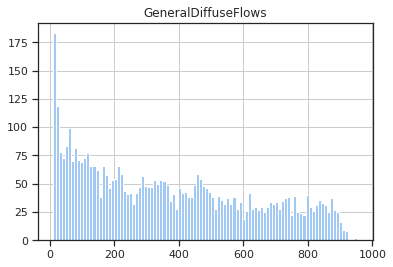

In [127]:
# General diffuse flows, very right skewed
# Appears to be an hourly phenomenon, with energy consumption being much higher during the day and lower at night (due to business operations?)
gdf_analysis = power_hour.copy()

# Cut into 2 evenly sized buckets
gdf_analysis['gdf_qcut_n'] = pd.qcut(gdf_analysis['GeneralDiffuseFlows'], 2)
gdf_analysis['gdf_qcut_n'].value_counts()


gdf1 = gdf_analysis[gdf_analysis["GeneralDiffuseFlows"]<9.947].copy()
gdf1.describe() # Mean temp 16.9
gdf1.value_counts("Month") # more winter than summer
gdf1.value_counts("Hour") # mostly 21:00 - 05:00, with the exact same number of obs 


gdf2 = gdf_analysis[gdf_analysis["GeneralDiffuseFlows"]>=9.947].copy()
gdf2.describe() # Mean temp 20.7
gdf2.value_counts("Month") # summer rather than winter
gdf2.value_counts("Hour") # mostly 09:00 - 17:00 have basically identical number of obs

gdfHist1 = gdf1.hist(column = "GeneralDiffuseFlows", bins=100)
gdfHist2 = gdf2.hist(column = "GeneralDiffuseFlows", bins=100)

### Diffuse flows

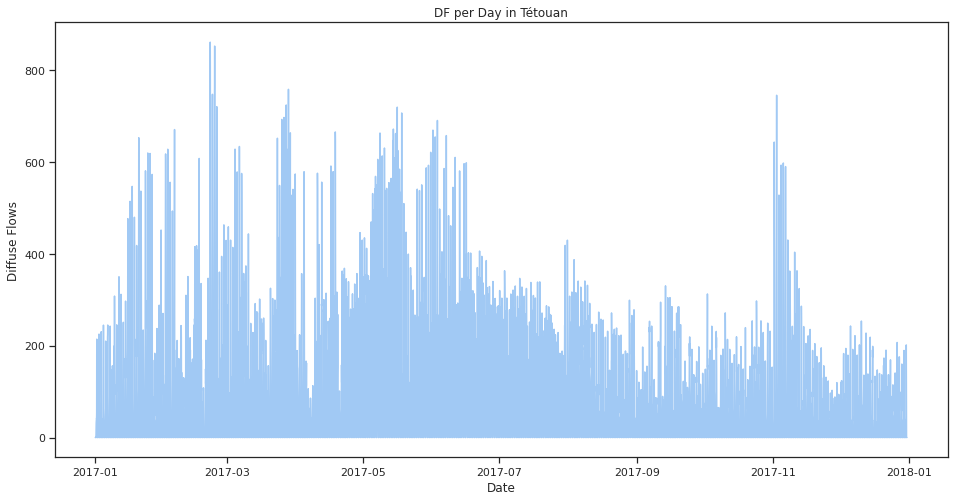

In [128]:
# Visualize
x_df=power_hour.index
y_df=power_hour["DiffuseFlows"]

plt.figure(figsize=(16,8))
plt.plot(x_df, y_df)

plt.xlabel('Date')
plt.ylabel('Diffuse Flows')
plt.title("DF per Day in Tétouan")
plt.show()
# Low in July - October, December. Spikes in March, November. Very irregular. Probably also hourly

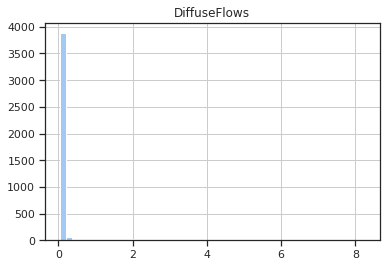

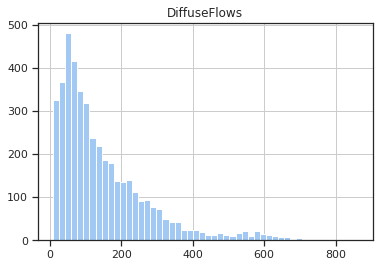

In [139]:
# Diffuse flows
# Appears to be an hourly phenomenon, with energy consumption being much higher during the day and lower at night (due to business operations?)

df_analysis = power_hour.copy()

# Cut into 2 evenly sized buckets
df_analysis['df_qcut_n'] = pd.qcut(df_analysis['DiffuseFlows'], 2)
df_analysis['df_qcut_n'].value_counts()


df1 = df_analysis[df_analysis["DiffuseFlows"]<8.241].copy()
df1.describe() # Mean temp 16.9
df1.value_counts("Month") # more winter than summer
df1.value_counts("Hour") # mostly 21:00 - 05:00, with the exact same number of obs 


df2 = df_analysis[df_analysis["DiffuseFlows"]>=8.241].copy()
df2.describe() # Mean temp 20.7
df2.value_counts("Month") # more summer rather than winter
df2.value_counts("Hour") # mostly 09:00 - 17:00, which have basically identical number of obs

dfHist1 = df1.hist(column = "DiffuseFlows", bins=50)
dfHist2 = df2.hist(column = "DiffuseFlows", bins=50)